## Exploratory Machine Learning Analysis

We have a main dataset that we will use to train a model, and predict the Life Ladder values.

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies.
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Main dataset.
df = pd.read_csv('ds19_happ_temp_cw_gg_pop_pm_co2.csv')
df.head()

,Country,Year,Life Ladder,Temperature,Clean Water,Greenhouse Gas Emissions,Population,PM2.5,CO2 Emissions
0,Afghanistan,2010,4.758,14.629,48.28708,44910.0,29185511.0,52.49585,8397779.0
1,Afghanistan,2011,3.832,16.487,50.82785,58650.0,30117411.0,57.09972,12105788.0
2,Afghanistan,2012,3.783,14.373,53.40352,66750.0,31161378.0,55.46611,10218514.0
3,Afghanistan,2013,3.572,16.156,56.01404,74800.0,32269592.0,59.62277,8440766.0
4,Afghanistan,2014,3.131,15.647,58.65937,84620.0,33370804.0,62.72192,7774340.0


In [3]:
# Drop any and all NaN values.
df = df.dropna()
df.head()

,Country,Year,Life Ladder,Temperature,Clean Water,Greenhouse Gas Emissions,Population,PM2.5,CO2 Emissions
0,Afghanistan,2010,4.758,14.629,48.28708,44910.0,29185511.0,52.49585,8397779.0
1,Afghanistan,2011,3.832,16.487,50.82785,58650.0,30117411.0,57.09972,12105788.0
2,Afghanistan,2012,3.783,14.373,53.40352,66750.0,31161378.0,55.46611,10218514.0
3,Afghanistan,2013,3.572,16.156,56.01404,74800.0,32269592.0,59.62277,8440766.0
4,Afghanistan,2014,3.131,15.647,58.65937,84620.0,33370804.0,62.72192,7774340.0


In [4]:
# Change Country column to categorical type.
df.Country = pd.Categorical(df.Country)
df.head()

,Country,Year,Life Ladder,Temperature,Clean Water,Greenhouse Gas Emissions,Population,PM2.5,CO2 Emissions
0,Afghanistan,2010,4.758,14.629,48.28708,44910.0,29185511.0,52.49585,8397779.0
1,Afghanistan,2011,3.832,16.487,50.82785,58650.0,30117411.0,57.09972,12105788.0
2,Afghanistan,2012,3.783,14.373,53.40352,66750.0,31161378.0,55.46611,10218514.0
3,Afghanistan,2013,3.572,16.156,56.01404,74800.0,32269592.0,59.62277,8440766.0
4,Afghanistan,2014,3.131,15.647,58.65937,84620.0,33370804.0,62.72192,7774340.0


In [5]:
# Change the Country to an integer value.
df.Country = df.Country.cat.codes
df.head()

,Country,Year,Life Ladder,Temperature,Clean Water,Greenhouse Gas Emissions,Population,PM2.5,CO2 Emissions
0,0,2010,4.758,14.629,48.28708,44910.0,29185511.0,52.49585,8397779.0
1,0,2011,3.832,16.487,50.82785,58650.0,30117411.0,57.09972,12105788.0
2,0,2012,3.783,14.373,53.40352,66750.0,31161378.0,55.46611,10218514.0
3,0,2013,3.572,16.156,56.01404,74800.0,32269592.0,59.62277,8440766.0
4,0,2014,3.131,15.647,58.65937,84620.0,33370804.0,62.72192,7774340.0


In [6]:
# Split values.
X = df.drop(columns='Life Ladder')
y = df['Life Ladder']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
# Create regression model.
model = LinearRegression(n_jobs=-1)

In [8]:
# Fit the model.
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [9]:
# Make predictions.
pred = model.predict(X_test)

In [10]:
# Compare the results.
results = pd.DataFrame(zip(pred, y_test), columns=['Predicted', 'Actual'])
results['Difference'] = abs(results['Predicted'] - results['Actual'])
results

,Predicted,Actual,Difference
0,6.018848,6.550,0.531152
1,6.219636,6.358,0.138364
2,5.822767,5.333,0.489767
3,3.170504,5.164,1.993496
4,6.027570,7.140,1.112430
...,...,...,...
216,6.324262,6.450,0.125738
217,5.955148,7.443,1.487852
218,4.137502,4.199,0.061498
219,5.918045,6.664,0.745955


In [11]:
# Style.
from matplotlib import style
style.use('fivethirtyeight')

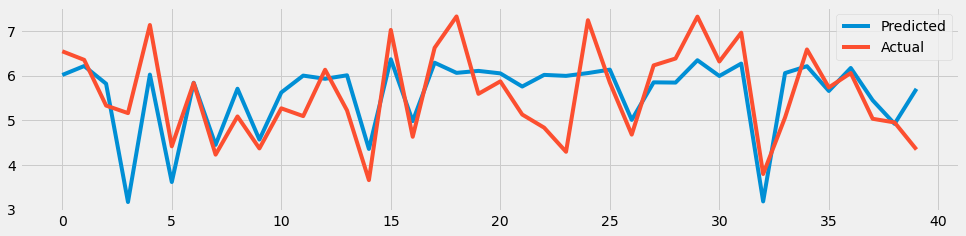

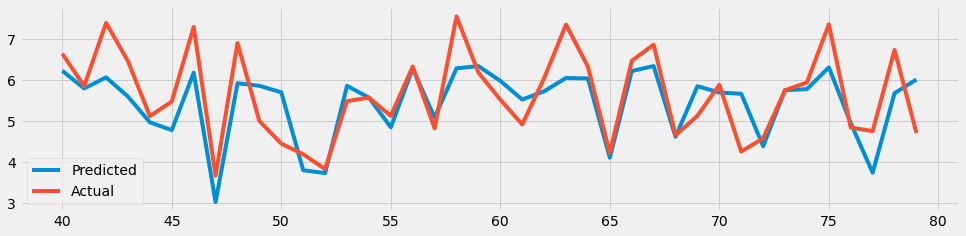

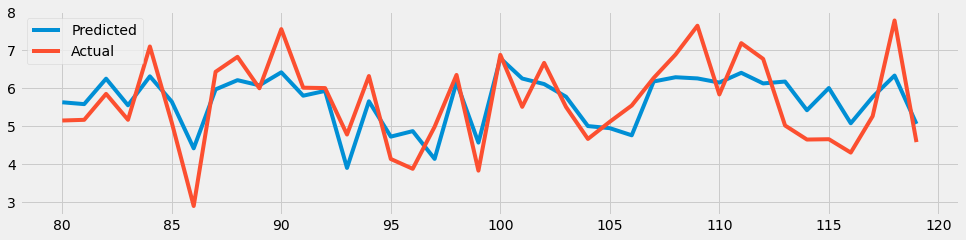

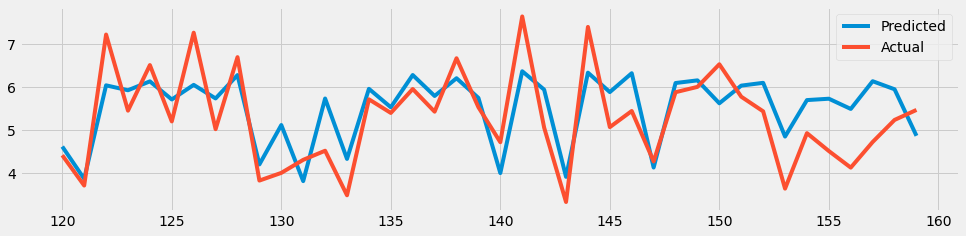

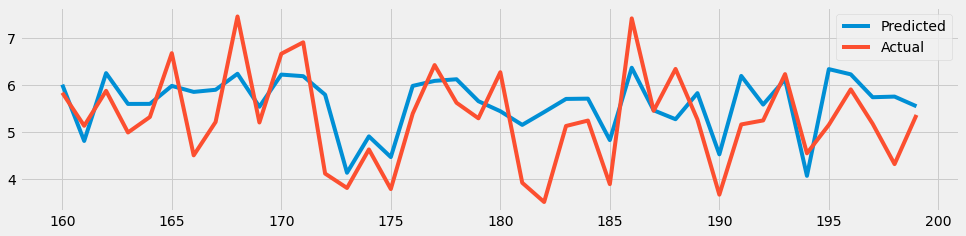

In [12]:
# Try and plot the differences.
bins = [0, 40, 80, 120, 160]
for i in bins:
    results.iloc[i:i+40].plot(y=['Predicted', 'Actual'], figsize=(15,3.5))

In [13]:
# Save results DF to compare to other models.
results.to_csv('ml_results/20_ml_results.csv', index=False)